Lets's start from importing needed libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
#importing data

df = pd.read_csv("googleplaystore.csv")

###### Quick overview

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So, we have 13 features and 10841 records. Each row refers to one app.

# Data preparation

######  Missing data

In [6]:
total = df.isnull().sum() #number of missing values
total

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As we can see, the biggest lack of data we have in feature "rating". but despite of this and 2 other features (where lack of data is below 0,001 %) - the dataset looks good. So let's start cleaning data from Rating.

###### Rating

In [7]:
df.Rating.describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

 We need to deal with so much missing data. It is to much to just remove them. I think it would be better to fill these values with the median of Rating value

In [8]:
Rating = df['Rating']
temp = np.array(Rating)
temp = temp.reshape(-1,1)

imp_mf = SimpleImputer(missing_values=np.nan, strategy='median')
Rating_imputed = imp_mf.fit_transform(temp)

df['Rating'] = Rating_imputed

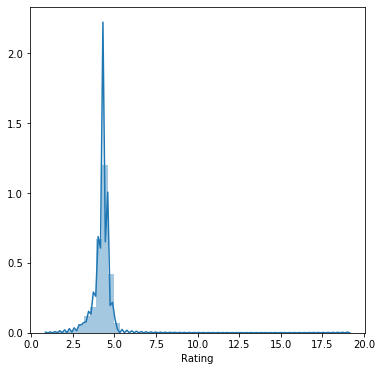

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(df['Rating'])

In [10]:
df['Rating'].describe()

count    10841.000000
mean         4.207841
std          0.500893
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64

We can now remove another missing data because it represents less than 0.001%

In [11]:
df.dropna(how ='any', inplace = True)
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


###### category


In [12]:
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'amount of app in each category')

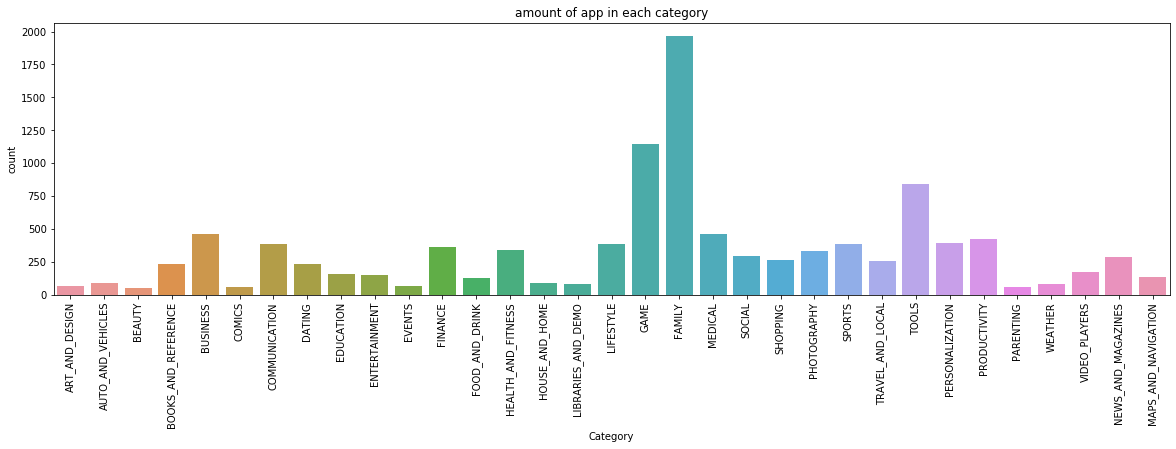

In [13]:
plt.figure(figsize=(20,5))
g = sns.countplot(x="Category",data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('amount of app in each category')

There are three main categories in which the number of applications exceeds 500 - Family applications, games and tools.

###### Size


In [14]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

The size is object type , so we need to convert this to int, but data contain also the metric symbol. Another problem is "Varies with device" - we need to convert this to numpy's Nan

In [16]:
print(len(df[df['Size'] == 'Varies with device']))
df['Size'].replace('Varies with device', np.nan, inplace = True )

1694


There are 1694 values 'Varies with device' - we replace them with method ffill which propagate last valid observation forward to next valid 

In [17]:
df.Size.fillna(method = 'ffill', inplace = True)

In [18]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
    
df["Size"] = df["Size"].map(change_size)
df.Size.fillna(method = 'ffill', inplace = True)

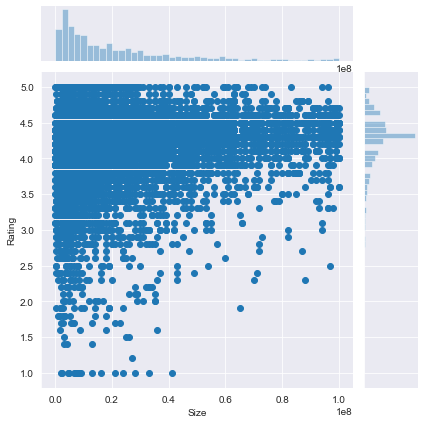

In [19]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])

######  Installs 


In [20]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [21]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

the installs is object type , so we need to convert this to int, but data contain also symbol +. We remove this symbol.

In [22]:
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [23]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Number of installs')

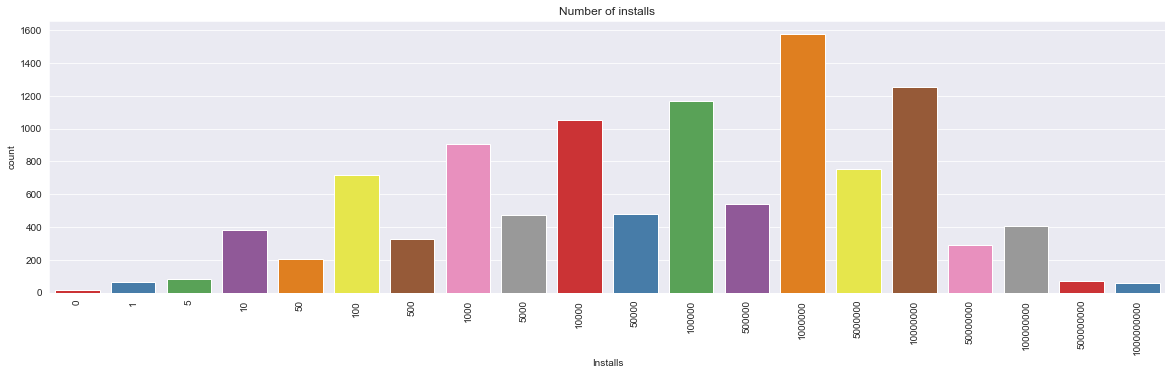

In [24]:
plt.figure(figsize=(20,5))
g = sns.countplot(x="Installs",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Number of installs')

###### Type



In [25]:
df['Type'].head()

0    Free
1    Free
2    Free
3    Free
4    Free
Name: Type, dtype: object

In [26]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

To better understanding our data - we convert type into binary. 1 refers to paid, 0 refers to free

In [27]:
df['Paid'] = df['Type'].map(lambda x :1  if x =='Free' else 0)

###### Price

The price is object type , so we need to convert this to float, but data contain also the $ symbol.

In [28]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [29]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

In [30]:
df['Price'].value_counts().sort_values().tail(10)

9.99       21
2.49       26
5.99       30
1.49       45
3.99       63
4.99       72
1.99       73
2.99      129
0.99      146
0.00    10032
Name: Price, dtype: int64

###### Content Rating

In [31]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

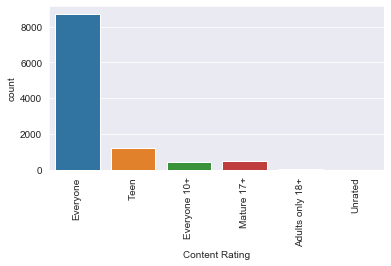

In [32]:
plt.figure(figsize=(6,3))
fig = sns.countplot(x=df['Content Rating'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

Conclusions

###### genres

In [33]:
print( len(df['Genres'].unique()) , "genres")

print(df['Genres'].unique())

119 genres
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativi

In [34]:
df.Genres.value_counts().tail(10)


Puzzle;Education                     1
Arcade;Pretend Play                  1
Music & Audio;Music & Video          1
Comics;Creativity                    1
Card;Brain Games                     1
Travel & Local;Action & Adventure    1
Entertainment;Education              1
Adventure;Brain Games                1
Parenting;Brain Games                1
Lifestyle;Education                  1
Name: Genres, dtype: int64

Many genre contain only few record, it may make a bias.
Then, I decide to group it to bigger genre by ignore sub-genre (after " ; " sign)

In [35]:
df['Genres'] = df['Genres'].str.split(';').str[0]

In [36]:
print(df['Genres'].unique())

['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [37]:
df.Genres.value_counts().tail(10)

Board            63
Comics           60
Parenting        60
Beauty           53
Card             51
Casino           39
Trivia           39
Word             29
Music            25
Music & Audio     1
Name: Genres, dtype: int64

music and audio can be generalized as just music

In [38]:
df['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [39]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).describe()

Rating                                                 
    count      mean       std  min    25%   50%   75%  max
0   382.0  4.286911  0.284298  3.1  4.200  4.30  4.50  5.0
1    91.0  4.220879  0.300561  3.4  4.100  4.30  4.50  4.7
2   237.0  4.307595  0.337025  3.1  4.200  4.40  4.50  5.0
3    68.0  4.363235  0.324108  3.4  4.100  4.40  4.70  5.0
4    85.0  4.205882  0.504823  2.1  4.000  4.30  4.50  4.9
5    53.0  4.283019  0.322094  3.1  4.100  4.30  4.50  4.9
6    63.0  4.300000  0.374597  2.8  4.100  4.30  4.60  4.8
7   233.0  4.334335  0.378320  2.7  4.200  4.30  4.60  5.0
8   460.0  4.182391  0.513537  1.0  4.100  4.30  4.40  5.0
9    51.0  4.113725  0.668736  1.0  4.000  4.30  4.50  4.9
10   39.0  4.287179  0.301906  3.5  4.100  4.30  4.50  4.7
11  270.0  4.188519  0.408526  2.4  4.000  4.30  4.40  5.0
12   60.0  4.160000  0.529214  2.8  3.875  4.35  4.50  5.0
13  388.0  4.180155  0.395051  1.0  4.100  4.30  4.40  5.0
14  234.0  4.025641  0.588320  1.0  3.900  4.20  4.30  5.0
15  644.0  4.310870  0.511795  1.0  4.200  4.30  4.60  5.0
16  112.0  4.125000  0.440413  1.9  3.900  4.25  4.40  4.8
17  666.0  4.127928  0.490574  1.6  3.900  4.30  4.40  5.0
18   64.0  4.395313  0.356094  2.9  4.300  4.30  4.60  5.0
19  366.0  4.151639  0.605532  1.0  4.000  4.30  4.50  5.0
20  127.0  4.185827  0.509548  1.7  4.050  4.30  4.50  5.0
21  343.0  4.280175  0.575639  1.4  4.200  4.40  4.60  5.0
22   88.0  4.211364  0.343890  2.8  4.000  4.30  4.50  4.8
23   84.0  4.208333  0.336247  3.1  4.075  4.30  4.40  5.0
24  383.0  4.131854  0.633058  1.5  3.900  4.30  4.50  5.0
25  137.0  4.075182  0.499821  1.9  3.900  4.20  4.40  4.9
26  463.0  4.216199  0.578714  1.0  4.200  4.30  4.50  5.0
27   26.0  4.257692  0.397163  3.1  4.050  4.30  4.50  4.7
28  283.0  4.161837  0.491011  1.7  4.000  4.30  4.40  5.0
29   60.0  4.300000  0.471924  2.0  4.100  4.35  4.60  5.0
30  390.0  4.328205  0.316592  2.5  4.200  4.30  4.50  5.0
31  335.0  4.197910  0.450909  2.0  4.100  4.30  4.50  5.0
32  424.0  4.226651  0.460519  1.0  4.200  4.30  4.50  5.0
33  166.0  4.378916  0.298848  2.9  4.300  4.40  4.60  5.0
34  119.0  4.202521  0.304893  3.3  4.000  4.30  4.40  5.0
35  123.0  4.269919  0.333863  2.8  4.100  4.30  4.50  4.8
36  260.0  4.263077  0.387176  1.6  4.100  4.30  4.50  5.0
37  218.0  4.175688  0.391389  2.9  4.000  4.30  4.40  5.0
38  295.0  4.261017  0.387920  1.9  4.100  4.30  4.50  5.0
39  402.0  4.248010  0.386633  1.5  4.100  4.30  4.50  5.0
40  110.0  4.257273  0.365598  2.9  4.200  4.30  4.50  4.8
41  841.0  4.079667  0.581728  1.0  3.900  4.30  4.40  5.0
42  258.0  4.132946  0.476408  2.2  4.000  4.30  4.40  5.0
43   39.0  4.112821  0.692128  1.4  4.200  4.30  4.45  5.0
44  178.0  4.083146  0.526525  1.8  3.800  4.30  4.40  4.9
45   82.0  4.248780  0.317103  3.3  4.200  4.30  4.50  4.8
46   29.0  4.406897  0.320637  3.8  4.200  4.40  4.70  4.9

Observing from Standard Deviation, seem like genre is not effect too much to rating

###### Reviews

In [40]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [41]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [42]:
df['Reviews'].describe()

count    1.082900e+04
mean     4.446018e+05
std      2.929213e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.100000e+03
75%      5.481500e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Text(0.5, 1.0, 'Distribution of Review')

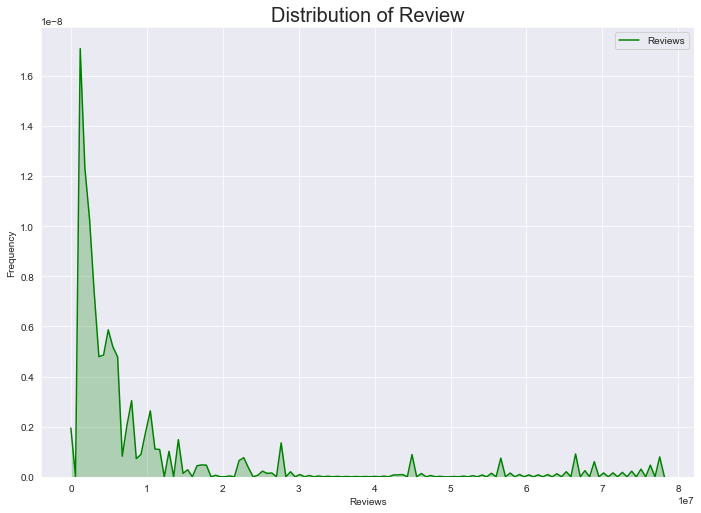

In [43]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Review',size = 20)

As we can see, the most of review are between 0 and 1 milion

Text(0.5, 1.0, 'Rating VS Reveiws')

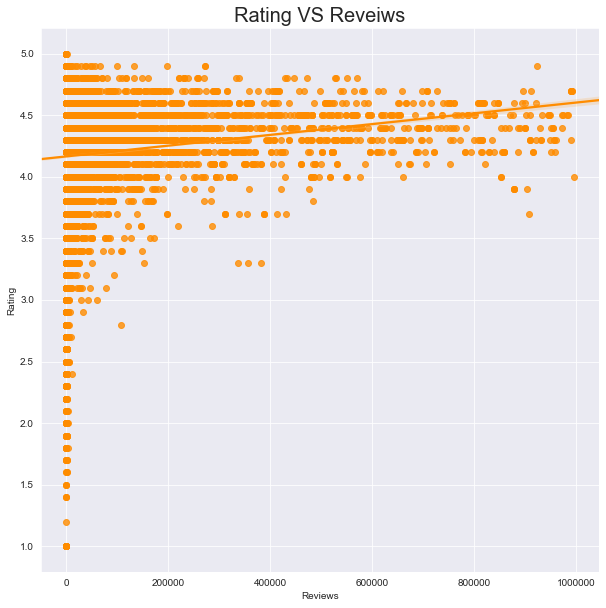

In [44]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

Seem like well-known application will get a good rating

The 3 last features 'Last Updated','Current Ver','Android Ver' I removed this piece of information because I found it unnecessary.

In [45]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)